# Introduction to Jupyter Notebooks, [NumPy](https://numpy.org/doc/stable/user/absolute_beginners.html) and [Matplotlib](https://matplotlib.org/stable/tutorials/pyplot.html)

These will be our two most standard imports, which by convention are imported into the namespace as `plt` and `np`.


In [21]:
import numpy as np
from matplotlib import pyplot as plt
import random

# Import and visualize standard benchmark image data sets

## Examine and draw data from [MNIST](https://yann.lecun.com/exdb/mnist/)





In [22]:
from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()

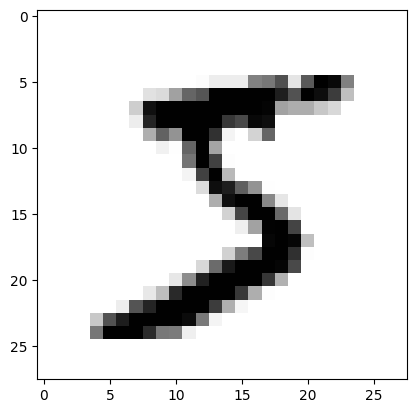

In [23]:
## Basic matplotlib command to plot a single digit
plt.imshow(train_X[0], cmap=plt.cm.binary)
plt.show()

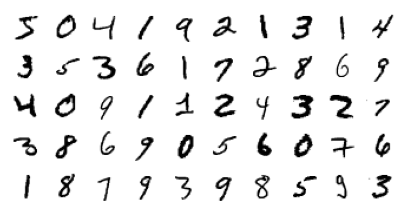

In [24]:
## Creating a grid to plot the first 50 digits on
h, w = 5, 10
fig, axes = plt.subplots(h, w, figsize = (w*0.5, h*0.5))
for i in range(h):
    for j in range(w):
        axes[i][j].imshow(train_X[w * i + j], cmap=plt.cm.binary)
        axes[i][j].axis('off')

### Task 1
Now can you make a plot where each column contains the first 5 instances of that digit from the dataset?

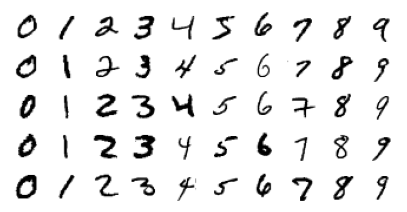

In [25]:
# yay!
indicies = [[] for _ in range(10)]
for i in range(len(train_y)):
  if len(indicies[train_y[i]]) != 5:
    indicies[train_y[i]].append(i)

h, w = 5, 10
fig, axes = plt.subplots(h, w, figsize = (w*0.5, h*0.5))
for i in range(h):
    for j in range(w):
        axes[i][j].imshow(train_X[indicies[j][i]], cmap=plt.cm.binary)
        axes[i][j].axis('off')

## Examine and draw data from [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html)

In [26]:
from keras.datasets import cifar10
(train_X, train_y), (test_X, test_y) = cifar10.load_data()

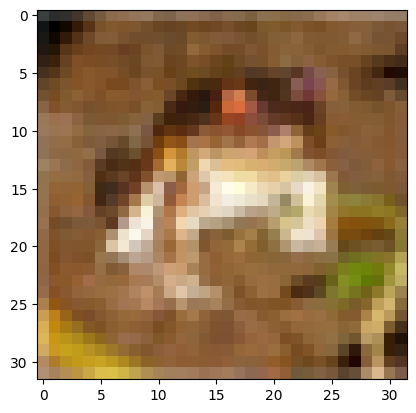

In [27]:
## Basic matplotlib command to plot a image
plt.imshow(train_X[0])
plt.show()

### Task 2
Make a similar grid for CIFAR-10, where either each row or each column all has images from the same class, and add a label for that class

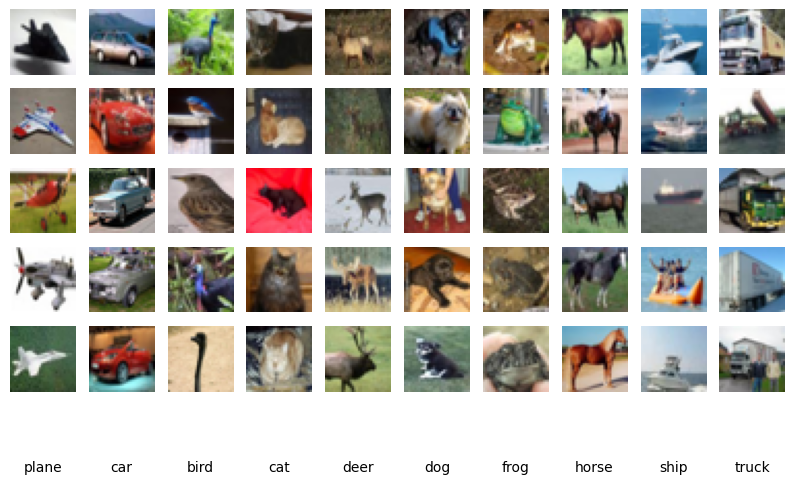

In [28]:
# yay!
indicies = [[] for _ in range(10)]
for i in range(len(train_y)):
  if len(indicies[train_y[i][0]]) != 5:
    indicies[train_y[i][0]].append(i)

labels = [
    "plane",
    "car",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck"
]

h, w = 6, 10
fig, axes = plt.subplots(h, w, figsize = (w, h))
for i in range(h-1):
    for j in range(w):
        axes[i][j].imshow(train_X[indicies[j][i]], cmap=plt.cm.binary)
        axes[i][j].axis('off')

for j in range(w):
  axes[5][j].text(0.5, 0, labels[j], horizontalalignment="center")
  axes[5][j].axis('off')

### Bonus Tasks
Can you create any other visualizations of our datasets? Are there any other classification datasets you can find to visualize?

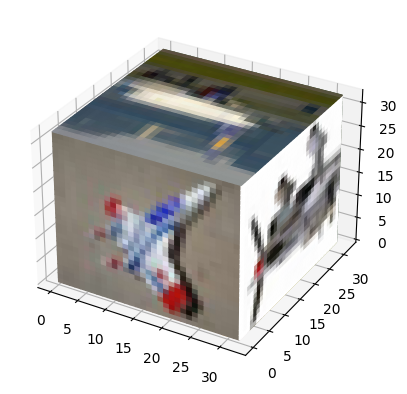

In [29]:
# This is an attempt to make a 3d matplotlib dice of the first 6 images for any category
from matplotlib.colors import Normalize, ListedColormap

# using matplotlibs example code to help:
def imshow3d(ax, array, value_direction='z', pos=0, norm=None, cmap=None):
    """
    Display a 2D array as a  color-coded 2D image embedded in 3d.

    The image will be in a plane perpendicular to the coordinate axis *value_direction*.

    Parameters
    ----------
    ax : Axes3D
        The 3D Axes to plot into.
    array : 2D numpy array
        The image values.
    value_direction : {'x', 'y', 'z'}
        The axis normal to the image plane.
    pos : float
        The numeric value on the *value_direction* axis at which the image plane is
        located.
    norm : `~matplotlib.colors.Normalize`, default: Normalize
        The normalization method used to scale scalar data. See `imshow()`.
    cmap : str or `~matplotlib.colors.Colormap`, default: :rc:`image.cmap`
        The Colormap instance or registered colormap name used to map scalar data
        to colors.
    """
    if norm is None:
        norm = Normalize()
    colors = plt.get_cmap(cmap)(norm(array))

    if value_direction == 'x':
        nz, ny = array.shape
        zi, yi = np.mgrid[0:nz + 1, 0:ny + 1]
        xi = np.full_like(yi, pos)
    elif value_direction == 'y':
        nx, nz = array.shape
        xi, zi = np.mgrid[0:nx + 1, 0:nz + 1]
        yi = np.full_like(zi, pos)
    elif value_direction == 'z':
        ny, nx = array.shape
        yi, xi = np.mgrid[0:ny + 1, 0:nx + 1]
        zi = np.full_like(xi, pos)
    else:
        raise ValueError(f"Invalid value_direction: {value_direction!r}")
    ax.plot_surface(xi, yi, zi, rstride=1, cstride=1, facecolors=colors, shade=False)

# the power of Github Copilot:
def split_image(image):
    # Initialize colormap and indexed image
    cmap_dict = {}
    indexed_image = np.zeros((32, 32), dtype=int)
    
    # Initialize index counter
    index = 0
    
    # Iterate over each pixel in the image
    for i in range(32):
        for j in range(32):
            rgb = tuple(image[i, j])
            if rgb not in cmap_dict:
                cmap_dict[rgb] = index
                index += 1
            indexed_image[i, j] = cmap_dict[rgb]
    
    # Create a list of RGB values for the colormap
    cmap_list = [np.array(rgb)/255.0 for rgb in cmap_dict.keys()]
    
    # Create a ListedColormap
    cmap = ListedColormap(cmap_list)
    
    return cmap, indexed_image

# my stuff
def make_3d_plot(data_X, data_y, category:int = 0) -> None:
  # category is the int in the list

  ax = plt.figure().add_subplot(projection='3d')

  # image shape is (32, 32, 3) so 32x32 sides

  indices = []
  for i in range(len(data_y)):
    if data_y[i] == category:
      indices.append(i)
      if len(indices) == 6: break

  if len(indices) < 6:
    # no dice!
    return -1

  dirs = 'xyzxyz'
  positions = [0, 0, 0, 32, 32, 32]
  for i, dr, pos in zip(range(6), dirs, positions):
    cmap, img = split_image(data_X[indices[i]])
    imshow3d(ax, img, dr, pos, cmap=cmap)

  plt.show()

# change 0 to any other category value to see its dice plot
# unfortunately, due to the .ipynb file, this is not interactive.
# If the code were run in a normal python file, it would be interactive.
make_3d_plot(train_X, train_y, 0)


# Generate Toy 2D Data Sets

Our standard image data sets will be very high dimensional, so it will be useful to also have some 2D example data sets that let us visualize how our various models work.

`X` will be a numpy array of datapoints and `y` will be a numpy array of class labels, which for our purposes will simply be integers starting at `0`.

In [30]:
#### Example data points to show
X = np.array([[ 1.09552218, -0.09272374],
       [ 0.73918262,  0.17328342],
       [ 0.49026465,  0.49654933],
       [ 0.22117347,  0.74908991],
       [-0.00771262,  0.9228498 ],
       [ 0.04485428, -0.07363758],
       [-0.18909266,  0.24609735],
       [-0.50931804,  0.40888908],
       [-0.77501111,  0.76200558],
       [-0.92010407,  1.0518896 ]])
y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

Given these data types, here's a simple function that produces a scatter plot, colored by classification label

In [31]:
def plot_2d_data(X, y):
    fig, ax = plt.subplots(figsize = (5, 5))
    ax.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral, edgecolors='black')

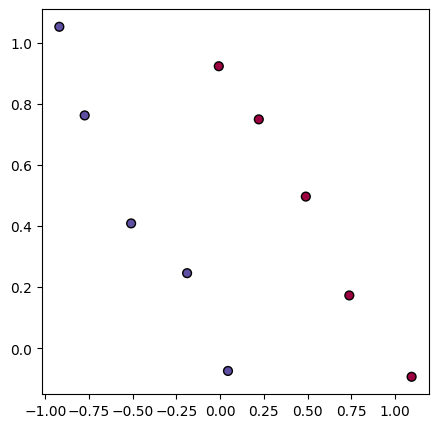

In [32]:
plot_2d_data(X,y)

## Points on a line with noise

### Task 3
We are going to make some toy 2D data sets to later visualize how various models work. Here's one concrete function to write:

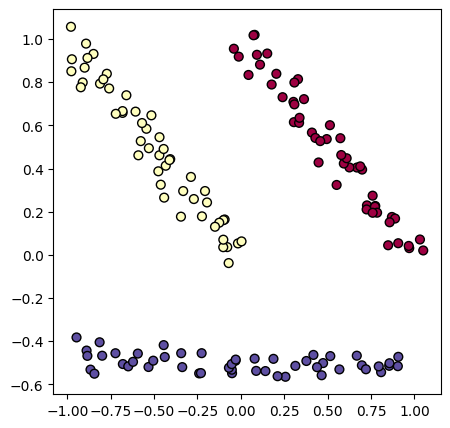

In [33]:
def make_cluster_data(num_points = 50, noise = 0.05,
                      line_points = [((1,0), (0,1)),
                                     ((0, 0), (-1, 1)),
                                     ((-1,-0.5), (1,-0.5))]):
    """Create num_points points linearly spaced between each pair of points in line_points,
    with a gaussian noise term added, where noise is the standard deviation."""
    n = num_points * len(line_points)
    points = np.zeros((n, 2))
    labels = np.zeros(n, dtype=int)
    ### Fill in the function
    rng = np.random.default_rng(16)
    pt = 0 # this is very not neccecary but cleaner
    for i in range(len(line_points)):
      dy, dx = (line_points[i][1][1] - line_points[i][0][1]), (line_points[i][1][0] - line_points[i][0][0])
      for j in range(num_points):
        offset_x, offset_y = rng.normal(scale=noise), rng.normal(scale=noise)
        x, y = line_points[i][0][0] + dx*(j/num_points), line_points[i][0][1] + dy*(j/num_points)
        points[pt][0] = x + offset_x
        points[pt][1] = y + offset_y
        labels[pt] = i
        pt += 1

    return points, labels

plot_2d_data(*make_cluster_data())

As an example, if we call
`plot_2d_data(*make_cluster_data())`
with these default settings, we should see an image like
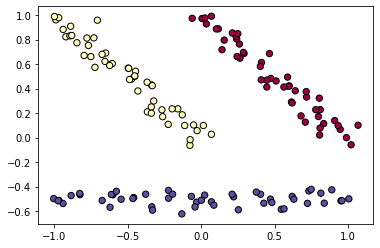

## Bonus Task

Can you make any other interesting looking data sets in a 2d plane? One pretty choice is for data that is in a spiral shape
`plot_2d_data(*make_spiral_data(100, 3))`
makes the following

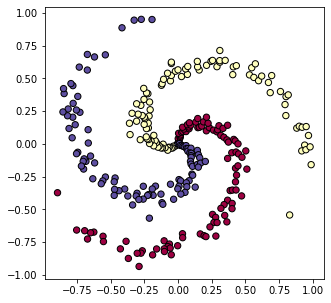

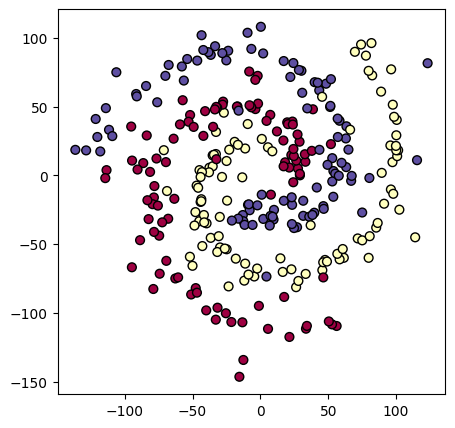

In [57]:
random.seed(16)
def make_spiral_data(num_points, num_classes):
    """Generate spiral data."""
    angles = list(np.linspace(0, 360, num_classes+1))
    angles.pop(-1)

    # the 2 below can be tweaked for different sorts of spirals, possibly make them kwargs?
    angl_off = 3 # the more this is, the longer the spiral but more spaced out
    noise = 3 # how much randomness there is

    rng = np.random.default_rng(16)
    n = num_points*num_classes
    ans = np.zeros((n, 2))
    labels = np.zeros(n, dtype=int)
    mul = [1, 1, 1, 5, 10]

    for i in range(num_points):
      for j in range(num_classes):
        # the radius and angle of our polar points
        rad = i+20
        angl = angles[j]*np.pi/180

        # convert to cartesian
        y = np.sin(angl)*rad
        x = np.cos(angl)*rad
        offset_x, offset_y = rng.normal(scale=noise)*random.choice(mul), rng.normal(scale=noise)*random.choice(mul)

        # affect ans
        ans[i*num_classes + j][0] = x+offset_x
        ans[i*num_classes + j][1] = y+offset_y
        labels[i*num_classes + j] = j
        angles[j] = (angles[j]+angl_off)%360

    return ans, labels

plot_2d_data(*make_spiral_data(100, 3))

# Test 2D Data Sets
Here's a function we will use more in future assignments to visualize the classification boundaries our model is creating

In [35]:
def plot_2d_classifier(X, y, classifier):
    """Makes a scatter plot of the data points and a background of what the classifier does.
    X is a (n,2) array of data points.
        y is an (n,) array of labels.
        classifier is a function that takes a 2d points
         and gives a label."""
    border = 0.2
    x_min, x_max = X[:, 0].min() - border, X[:, 0].max() + border
    y_min, y_max = X[:, 1].min() - border, X[:, 1].max() + border
    num_points = 100
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, num_points),
                        np.linspace(y_min, y_max, num_points))
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    classes = np.array([classifier(p) for p in grid_points])
    classes = classes.reshape(xx.shape)
    fig = plt.figure(figsize = (6,6))
    plt.contourf(xx, yy, classes, 3, cmap=plt.cm.Spectral, alpha=1)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral, edgecolors='black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

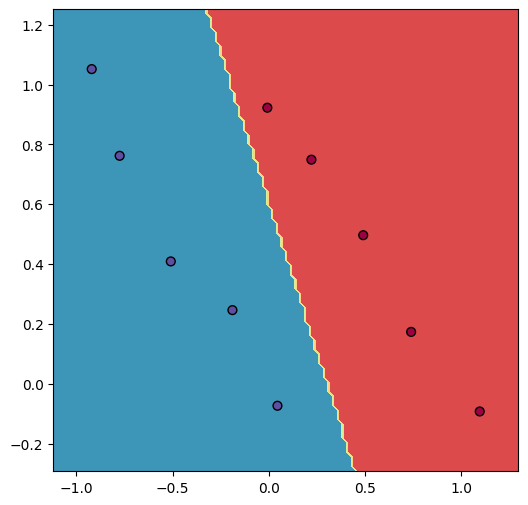

In [36]:
#### Example data points to show
X = np.array([[ 1.09552218, -0.09272374],
       [ 0.73918262,  0.17328342],
       [ 0.49026465,  0.49654933],
       [ 0.22117347,  0.74908991],
       [-0.00771262,  0.9228498 ],
       [ 0.04485428, -0.07363758],
       [-0.18909266,  0.24609735],
       [-0.50931804,  0.40888908],
       [-0.77501111,  0.76200558],
       [-0.92010407,  1.0518896 ]])
y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

def predict(x):
    if x[0] + 0.5 * x[1] > 0.3:
        return 0
    else:
        return 1

plot_2d_classifier(X, y, predict)

### Bonus Task
Can you make a handwritten function for any of your toy data sets that does a good job of classifying all the points?

# References

## Resources Used

Mention any resources used while working on this assignments (include links, mention people, put in LLM queries)

No LLM queries, mostly just documentation and occasionaly talking to Jasper.

## Reflection

How long did you spend working on this assignment?

whatever time at the end of class (did all the required stuff then) + 20 minutes at home on the bonuses

Any issues / feedback?

nope!

on a side note, Jasper only told me about np.linspace after I wrote the code to do the linear spacing manually, which took about 20 minutes of time. Next time, I will comb through numpy to try and avoid writing code that already exists